# Results analisys

This Notebook has the intention to compares the metrics of a DRL Policy and a RB Policy applied both to a Building Control in EnergyPlus model.

## Importing the evaluation result files

First you need to import the files produced by `init_conventional.py` `init_evaluation.py`. The first is the RB Policy applied to the evaluation case, while the second one is the DRL Policy applied to the same scenario.

In [116]:
# Import the necesaty libraries
import pandas as pd

# Replace 'ppo_file_path' and 'rb_file_path' with the actual paths to your CSV files
drl_file_path = "C:/Users/grhen/Downloads/VN_P1_0.5_DQN_72.csv"
rb_file_path = "C:/Users/grhen/Documents/ray_results/conventional_test/VN_P1_0.5_RB.csv"

# Read CSV files into pandas DataFrames
drl_data = pd.read_csv(drl_file_path, header=None)
rb_data = pd.read_csv(rb_file_path, header=None)

# Function to clean and format the data
def clean_and_format(data: pd.DataFrame):
    # Remove empty rows
    data = data.dropna(how='all')

    # Add the specified header
    header = ["To", "Ti", "v", "d", "RHo", "RHi", "dh", "dc", "opening_window_1", "opening_window_2",
              'hora', 'simulation_day', 'volumen', 'window_area_relation_north',
              'window_area_relation_west', 'window_area_relation_south', 'window_area_relation_east',
              'construction_config', 'internal_mass', 'latitud', 'longitud', 'altitud', 'beta', 'E_max',
              "rad", "reward", "terminated", "truncated", 'energy', 'comfort', 'ppd']

    data.columns = header

    return data

# Apply cleaning and formatting to both DataFrames
drl_data_cleaned = clean_and_format(drl_data)
rb_data_cleaned = clean_and_format(rb_data)

# Now 'ppo_data_cleaned' and 'rb_data_cleaned' contain the cleaned and formatted data


You can analyse the general results obtained in both files with the `describe` method of pandas for DataFrame types.

In [117]:
# General results of the RB Policy
rb_data_cleaned.describe()

,To,Ti,v,d,RHo,RHi,dh,dc,opening_window_1,opening_window_2,...,latitud,longitud,altitud,beta,E_max,rad,reward,energy,comfort,ppd
count,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,...,8.759000e+03,8.759000e+03,8759.0,8759.0,8759.0,8759.000000,8759.000000,8.759000e+03,8759.000000,8759.000000
mean,15.700365,19.101082,4.277813,201.389542,54.463828,62.046395,734.883314,143.914699,0.087567,0.087567,...,-3.298500e+01,-6.893000e+01,1043.0,0.5,2.5,230.157438,-0.364345,3.404374e-10,-4.027943,72.868975
std,7.843632,3.618424,2.309813,96.639529,18.648707,19.655905,748.719732,489.714005,0.282680,0.282680,...,7.105833e-15,2.842333e-14,0.0,0.0,0.0,326.822526,0.175343,2.931839e-10,3.208328,35.068625
min,-4.316667,11.148226,0.100000,0.000000,16.000000,14.963675,0.000000,0.000000,0.000000,0.000000,...,-3.298500e+01,-6.893000e+01,1043.0,0.5,2.5,0.000000,-0.500000,0.000000e+00,-11.402990,5.000309
25%,9.975000,15.902117,2.533333,153.000000,39.166667,47.166293,0.000000,0.000000,0.000000,0.000000,...,-3.298500e+01,-6.893000e+01,1043.0,0.5,2.5,0.000000,-0.500000,0.000000e+00,-7.022943,44.031084
50%,15.800000,19.148410,3.966667,212.000000,54.000000,59.310435,0.000000,0.000000,0.000000,0.000000,...,-3.298500e+01,-6.893000e+01,1043.0,0.5,2.5,0.000000,-0.480813,5.787037e-10,-2.657740,96.162695
75%,21.308333,22.055907,5.700000,262.166667,68.666667,75.364861,1500.000000,0.000000,0.000000,0.000000,...,-3.298500e+01,-6.893000e+01,1043.0,0.5,2.5,450.500000,-0.220155,5.787037e-10,-1.372098,100.000000
max,37.650000,29.298547,14.500000,359.833333,100.000000,100.000000,1500.000000,5064.795565,1.000000,1.000000,...,-3.298500e+01,-6.893000e+01,1043.0,0.5,2.5,1091.333333,-0.025002,1.957328e-09,0.832879,100.000000


In [118]:
# General results of the DRL Policy
drl_data_cleaned.describe()

,To,Ti,v,d,RHo,RHi,dh,dc,opening_window_1,opening_window_2,...,latitud,longitud,altitud,beta,E_max,rad,reward,energy,comfort,ppd
count,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.0,8759.000000,...,8.759000e+03,8.759000e+03,8759.0,8759.0,8759.0,8759.000000,8759.000000,8.759000e+03,8759.000000,8759.000000
mean,15.700365,17.595112,4.277813,201.389542,54.463828,46.891948,868.102326,180.842562,0.0,0.995319,...,-3.298500e+01,-6.893000e+01,1043.0,0.5,2.5,230.157438,-0.389563,4.045344e-10,-4.730890,77.912616
std,7.843632,5.250229,2.309813,96.639529,18.648707,12.268199,740.652645,488.453734,0.0,0.068261,...,7.105833e-15,2.842333e-14,0.0,0.0,0.0,326.822526,0.168596,2.611999e-10,3.800987,33.719174
min,-4.316667,3.564616,0.100000,0.000000,16.000000,15.834867,0.000000,0.000000,0.0,0.000000,...,-3.298500e+01,-6.893000e+01,1043.0,0.5,2.5,0.000000,-0.500000,0.000000e+00,-13.694500,5.001014
25%,9.975000,13.565603,2.533333,153.000000,39.166667,38.321797,0.000000,0.000000,0.0,1.000000,...,-3.298500e+01,-6.893000e+01,1043.0,0.5,2.5,0.000000,-0.500000,0.000000e+00,-8.199802,59.681361
50%,15.800000,17.738474,3.966667,212.000000,54.000000,45.745487,1500.000000,0.000000,0.0,1.000000,...,-3.298500e+01,-6.893000e+01,1043.0,0.5,2.5,0.000000,-0.498727,5.787037e-10,-3.231167,99.745407
75%,21.308333,21.720406,5.700000,262.166667,68.666667,54.151984,1500.000000,0.000000,0.0,1.000000,...,-3.298500e+01,-6.893000e+01,1043.0,0.5,2.5,450.500000,-0.298407,5.787037e-10,-1.661537,100.000000
max,37.650000,31.247251,14.500000,359.833333,100.000000,96.971839,1500.000000,1500.000000,0.0,1.000000,...,-3.298500e+01,-6.893000e+01,1043.0,0.5,2.5,1091.333333,-0.025005,5.787037e-10,1.211131,100.000000


## Graphs

Some metrics are better whe we can see how they change in time. In this part graphs are created to a more detailed view of the results.

In [119]:
import matplotlib.pyplot as plt

def line_plot(
    drl_data_cleaned: pd.DataFrame,
    rb_data_cleaned: pd.DataFrame,
    column_name:str
    ):
    """Plot a line chart

    Args:
        ppo_data_cleaned (pd.DataFrame): The metrics of the DRL Policy to be ploted.
        rb_data_cleaned (pd.DataFrame): The metrics of the RB Policy to be ploted.
        column_name (str): The ID name of the column in the DataFrames evaluated.
    """
    # Plotting PPO results
    plt.plot(drl_data_cleaned[column_name], label='DRL')

    # Plotting RB results
    plt.plot(rb_data_cleaned[column_name], label='RB')

    # Adding labels and title
    plt.xlabel('Time Steps')
    plt.ylabel(column_name)
    plt.title(f'Comparison of {column_name} between DRL and RB policies')
    plt.legend()

    # Display the plot
    plt.show()


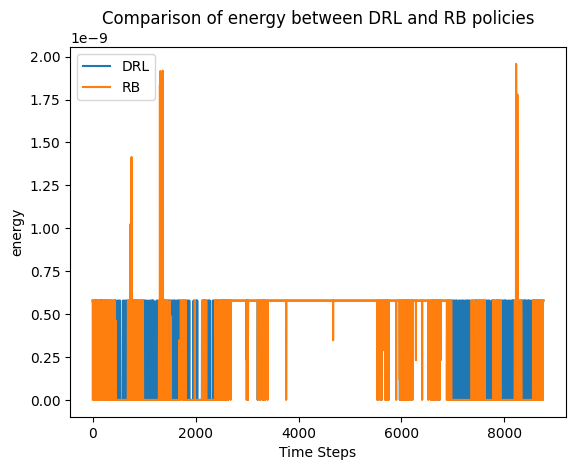

In [120]:
# Replace 'column_name' with the name of the column you want to plot
column_name = 'energy'

line_plot(
    drl_data_cleaned=drl_data_cleaned,
    rb_data_cleaned=rb_data_cleaned,
    column_name=column_name
    )

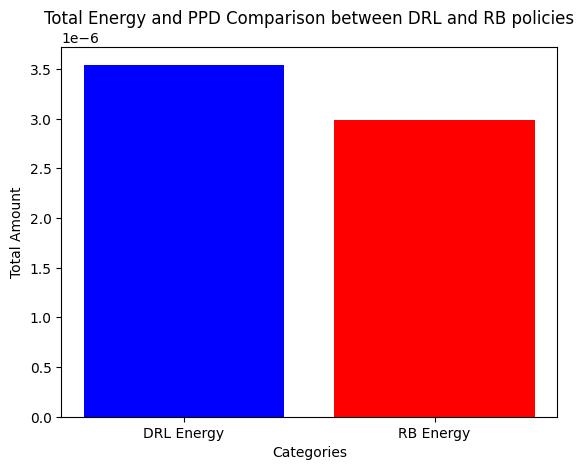

In [121]:
# Define the columns representing 'energy' and 'comfort'
energy_column = 'energy'

# Calculate total energy and comfort for each DataFrame
drl_total_energy = drl_data_cleaned[energy_column].sum()

rb_total_energy = rb_data_cleaned[energy_column].sum()

# Create a bar graph
categories = ['DRL Energy', 'RB Energy']
values = [drl_total_energy, rb_total_energy]

plt.bar(categories, values, color=['blue', 'red'])
plt.xlabel('Categories')
plt.ylabel('Total Amount')
plt.title('Total Energy and PPD Comparison between DRL and RB policies')
plt.show()

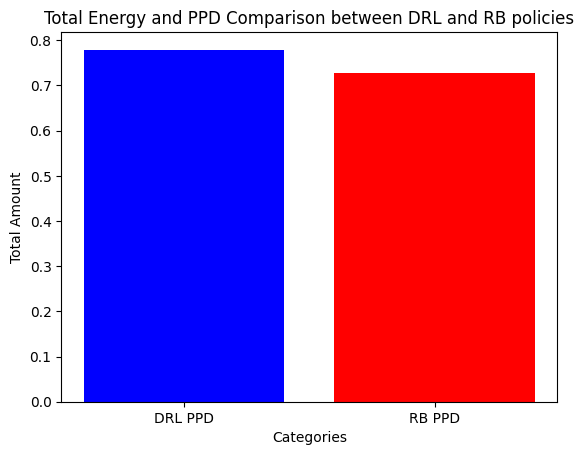

In [122]:
# Define the columns representing 'energy' and 'comfort'
ppd_column = 'ppd'

# Calculate total energy and comfort for each DataFrame
drl_total_ppd = drl_data_cleaned[ppd_column].mean()/100

rb_total_ppd = rb_data_cleaned[ppd_column].mean()/100

# Create a bar graph
categories = ['DRL PPD', 'RB PPD']
values = [drl_total_ppd, rb_total_ppd]

plt.bar(categories, values, color=['blue', 'red'])
plt.xlabel('Categories')
plt.ylabel('Total Amount')
plt.title('Total Energy and PPD Comparison between DRL and RB policies')
plt.show()

In [123]:
drl_energy_rate_increment = (drl_total_energy-rb_total_energy)/rb_total_energy
drl_comfort_rate_increment = (drl_total_ppd-rb_total_ppd)/rb_total_ppd

print('The Energy Rate Increment of DRL Policy is: ' + str(round(drl_energy_rate_increment*100, 2))+'%\n')
print('The PPD Rate Increment of DRL Policy is: ' + str(round(drl_comfort_rate_increment*100, 2))+'%')

The Energy Rate Increment of DRL Policy is: 18.83%

The PPD Rate Increment of DRL Policy is: 6.92%


## Análisis de políticas

En este apartado analizaremos las políticas seguidas por el agente DRL y las compararemos con las del RB.
Para ello, caracterizaremos algunas métricas generales que contemplen el año entero y luego nos enfocaremos en el estudio de algunas semanas características para observar el comportamiento de cada política.

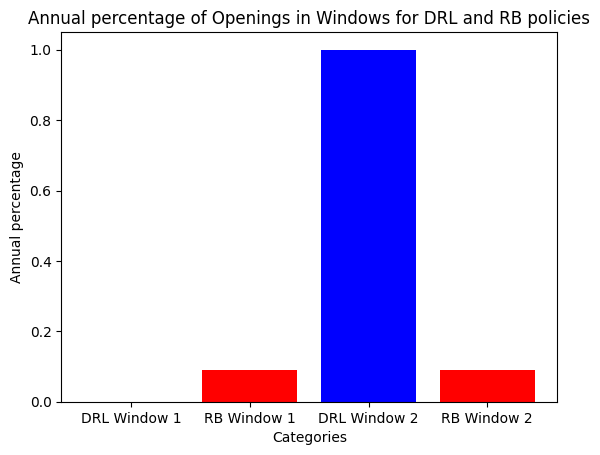

In [124]:
# Define the columns representing 'energy' and 'comfort'
metrics = [
    round(drl_data_cleaned.describe()['opening_window_1']['mean'],2),
    round(drl_data_cleaned.describe()['opening_window_2']['mean'],2),
    round(rb_data_cleaned.describe()['opening_window_1']['mean'],2),
    round(rb_data_cleaned.describe()['opening_window_2']['mean'],2)
]

# Create a bar graph
categories = ['DRL Window 1', 'RB Window 1', 'DRL Window 2', 'RB Window 2']
values = [metrics[0], metrics[2], metrics[1], metrics[3]]

plt.bar(categories, values, color=['blue', 'red', 'blue', 'red'])
plt.xlabel('Categories')
plt.ylabel('Annual percentage')
plt.title('Annual percentage of Openings in Windows for DRL and RB policies')
plt.show()

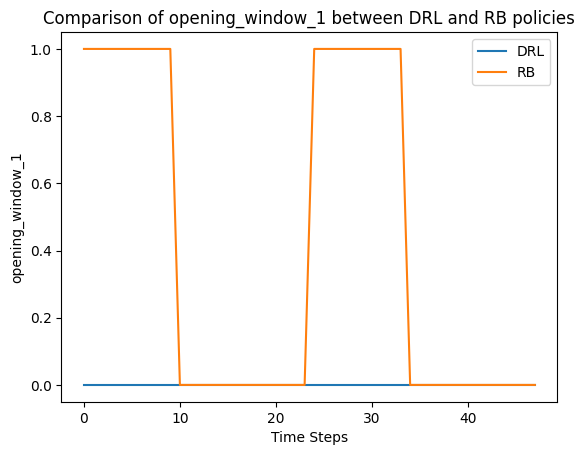

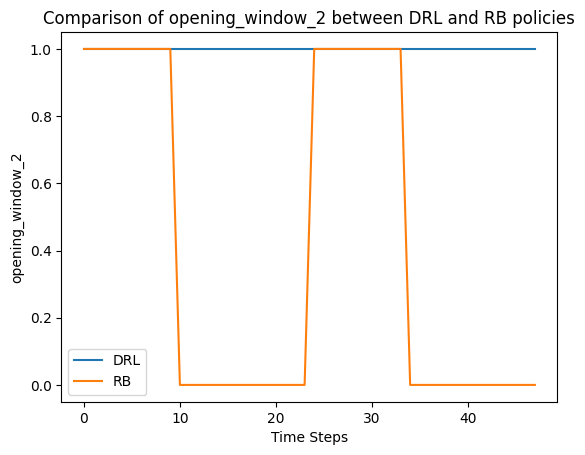

In [125]:
# Replace 'column_name' with the name of the column you want to plot
column_name = 'opening_window_1'

line_plot(
    drl_data_cleaned=drl_data_cleaned.iloc[:48],
    rb_data_cleaned=rb_data_cleaned.iloc[:48],
    column_name=column_name
    )

# Replace 'column_name' with the name of the column you want to plot
column_name = 'opening_window_2'

line_plot(
    drl_data_cleaned=drl_data_cleaned.iloc[:48],
    rb_data_cleaned=rb_data_cleaned.iloc[:48],
    column_name=column_name
    )

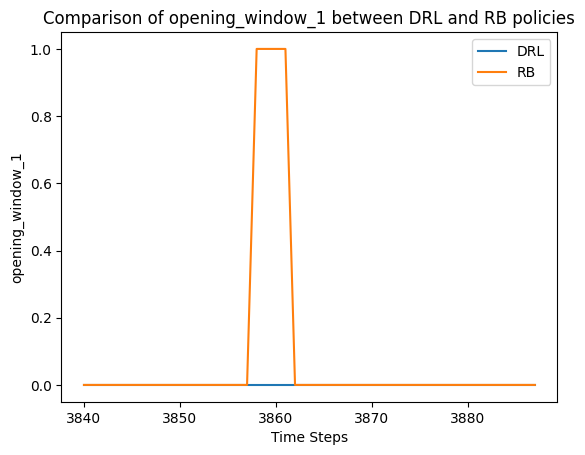

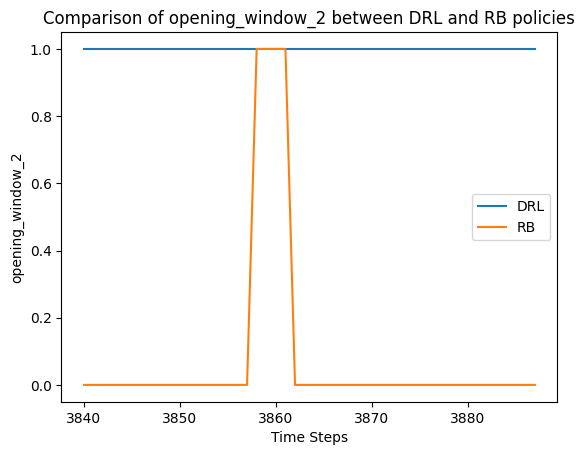

In [126]:
# Replace 'column_name' with the name of the column you want to plot
column_name = 'opening_window_1'

line_plot(
    drl_data_cleaned=drl_data_cleaned.iloc[3840:3888],
    rb_data_cleaned=rb_data_cleaned.iloc[3840:3888],
    column_name=column_name
    )

# Replace 'column_name' with the name of the column you want to plot
column_name = 'opening_window_2'

line_plot(
    drl_data_cleaned=drl_data_cleaned.iloc[3840:3888],
    rb_data_cleaned=rb_data_cleaned.iloc[3840:3888],
    column_name=column_name
    )